# Social and Economic Networks

**Co-author**

> - [Philip Solimine, *UBC*](https://www.psolimine.net)  



**Prerequisites**

- [Introduction to Numpy](https://datascience.quantecon.org/../scientific/numpy_arrays.html)  
- [Applied Linear Algebra](https://datascience.quantecon.org/../scientific/applied_linalg.html)  
- [Randomnesss](https://datascience.quantecon.org/../scientific/randomness.html)  
- [Introduction to Pandas](https://datascience.quantecon.org/../pandas/intro.html)  


**Outcomes**

- Learn what a network is, and some of the basic terms of graph theory  
- Understand how to represent data as a network, to get a window into its underlying structure  
- Explore the relationship between networks and linear algebra, especially the role of eigenvalues in centrality, connectivity, and clustering  
- Apply these tools to real economic data  

## What is a network?

Simply put, a network is a map that shows us how different objects are related to each other.

Let’s take a look at one example, using a python library called NetworkX (which is included in Anaconda):

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

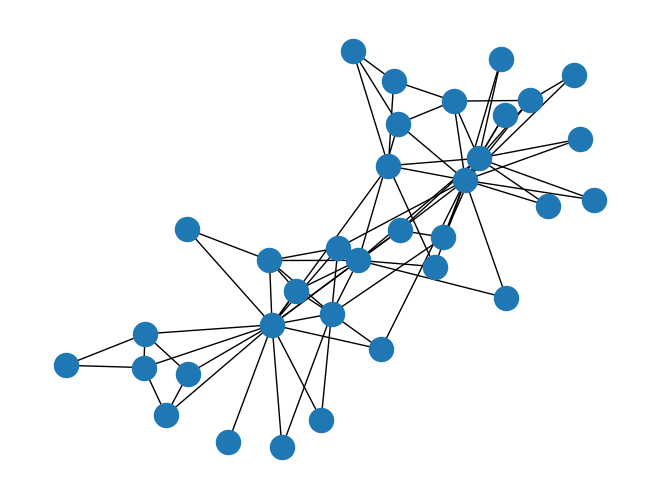

In [2]:
karate = nx.karate_club_graph() #import the Zachary's karate club network data from NetworkX
karate_layout = nx.spring_layout(karate,seed=2) #fix a random layout so we can get a consistent look at the network

nx.draw(karate,karate_layout) #plot the network

This is an example of a **social network**. (Specifically, it’s called “Zachary’s Karate Club Network”, and it represents some data collected by Wayne Zachary in 1977.) In this network, we have a set of dots representing people (**nodes** or **vertices**) who are connected by a line (**link** or **edge**) if they are friends with each other.

A data structure that consists of a set of nodes connected by a set of links is called a **graph**.

Importantly, this structure can be used to represent any situation where you have a group of objects and some information about how they are interconnected.

In economics, networks or graphs are often used to represent:

- Social or communication networks  
- Interbank lending relationships  
- Asset price correlations  
- Mobility of labor between firms  
- Job referrals  
- Supply chains  
- Markets between buyers and sellers  
- International trade  
- Transportation systems (roads and intersections)  
- *Many* other situations  


Networks are also useful in machine learning, where they are used to describe the connections between neurons in neural architectures, and correlations between random variables in graphical models.

## Graph basics in NetworkX

Since networks arise so naturally in so many problems, mathematicians, computer scientists, physicists, biologists, engineers, and social scientists have developed a lot of different tools that we can use to understand their structure. The mathematical study of networks and their structure is called **graph theory**.

The `networkx` library (`nx` for short) gives data scientists a convenient toolbox to these networks in Python. Here are some of the basic tools and terms in graph theory, and their Python implementation:

### Creating a new graph

Zachary’s Karate Club Network is a really popular choice for testing out new approaches to social network analysis. That’s partially because it’s a nice size to work with, and partially because every network scientist will recognize it, and its really easy to find (in fact, it’s built in to `networkx`)

But to introduce some of these topics, let’s start by making a new network from scratch. We can do this by creating an empty network with 12 nodes, and then filling it up with links:

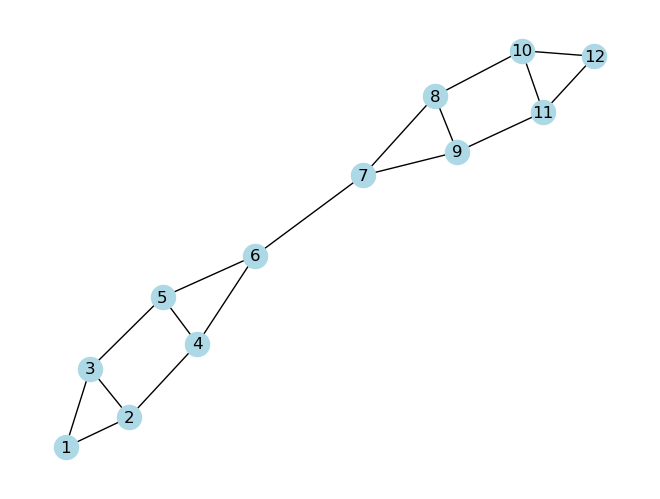

In [3]:
network = nx.Graph() #initialize a new graph
network.add_nodes_from(range(1,13)) #add a set of nodes numbered 1 through 12
edgelist = [(1,2), 
            (1,3),
            (2,3),
            (2,4),
            (3,5),
            (4,5),
            (4,6),
            (5,6),
            (6,7),
            (7,8),
            (7,9),
            (8,9),
            (8,10),
            (9,11),
            (10,11),
            (10,12),
            (11,12)]
network.add_edges_from(edgelist) #add a set of links or edges to form a network
positions = nx.spring_layout(network,seed=10) #fix the position again
nx.draw(network,positions,node_color="lightblue",with_labels=True) #plot the network graph

### (Un)directedness

Different types of situations can be represented using different types of graphs.

For example, the social network shown above is called an **undirected** network. This is because the links aren’t associated with any direction. Like a two-way road; if you can use a road to get from point A to point B, then you can also use it to get from point B to point A. (Think about Facebook friendships. If you are friends with someone on Facebook, then they are also friends with you. Thus, the Facebook friendship network is undirected)

This might make sense in certain situations. But in other cases, links can work more like a one-way street. (Think about Twitter. If you follow someone on Twitter, it doesn’t always mean they will follow you back.) This type of network is called **directed**.

In this lesson, we are going to focus on undirected networks. `NetworkX` should create an undirected network by default. But just in case, we can use `nx.is_directed()` to verify that our network is, in fact, undirected, without needing to draw it. Like this:

In [4]:
nx.is_directed(network) #check if the network is directed (True) or undirected (False). (We should expect False)

False

### Degree

If you’re looking at a real network, a natural question to ask is, “who has the most links?”

In an undirected network, the **degree** of a node is the number of connections that node has. For example, in our toy network, most of the nodes have degree 3. That is, except for nodes 1 and 2, which each have degree 2. We can verify this using `nx.degree()`.

In [5]:
deg = network.degree() # retrieve the degree sequence from our network
print(deg)

[(1, 2), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 2)]


We call the total number of links in the network the **degree of the network**. In this case, our example network has a degree of 17.

If we wanted to know the total number of links that would be possible in an undirected network with n nodes, we can use the simple formula $ \frac{1}{2}n*(n-1) $ to find it. For example, in our network we have 12 nodes. Each of these nodes can connect to 11 other people. So we multiply 12 nodes times 11 links, giving us 132. But we can’t forget that every link formed by a node must attach to one of the other nodes, so to find the actual maximum, we have to divide this number by 2, giving us 66 possible links.

If we divide the degree of a network by the maximum possible degree, it gives us a measure called the **density** of the graph. If a network has a density that is very close to 1, then we would call the network **dense**. On the other hand, if the density is closer to 0, we would call the network **sparse**. In general, dense networks give us more information. However, sparse networks can be valuable because they provide a lot of computational benefits.

The special cases of sparse and dense networks are the network with no links at all, and the network in which every node is connected to every other possible node. These networks are called the **empty network** and the **complete network**, respectively.

Density tells us a little bit about the structure of the network. But there is a lot more that we can examine, just by using degrees. For example, we can draw a histogram of all the nodes with each degree:

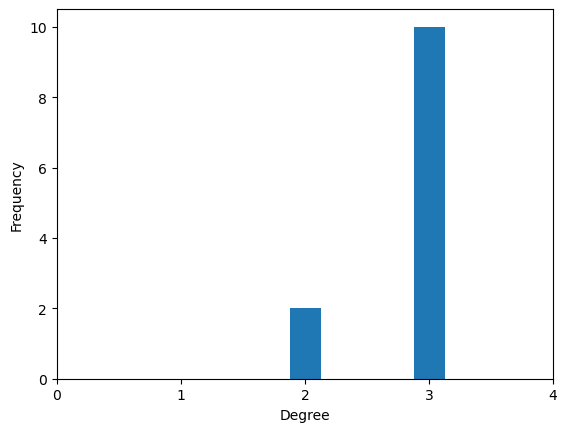

In [6]:
plt.bar(*np.unique([d for n,d in deg], return_counts=True),width=0.25) # this could also be done using plt.hist([d for n,d in deg]), but this way looks nicer
plt.xticks([0,1,2,3,4]);
plt.xlabel("Degree");
plt.ylabel("Frequency");

This agrees with our guess. Nodes 1 and 12 each have degree 2, while the remaining 10 nodes have 3 links each.

The distribution of degrees each node has is called its **degree distribution**, and is an easy way to get a feeling for the structure of your network. If every node had the same degree, we would call the network **regular**.

On the other hand, real world networks tend to be more complex. For example, let’s take a look at the degree distribution for the Zachary’s Karate Club network:

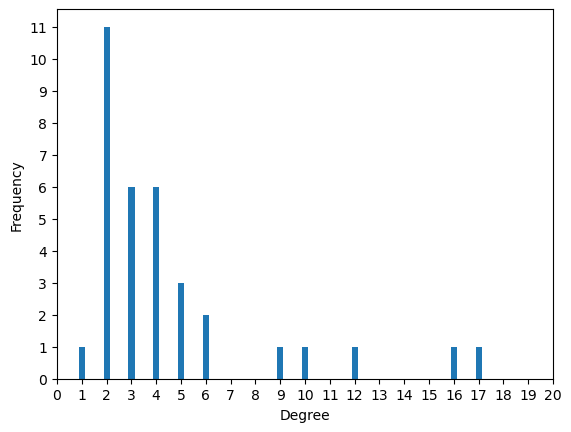

In [7]:
deg = karate.degree() # retrieve the degree sequence from the karate club network, and plot its histogram
plt.bar(*np.unique([d for n,d in deg], return_counts=True),width=0.25)
plt.xticks(range(0,21));
plt.yticks(range(0,12));
plt.xlabel("Degree");
plt.ylabel("Frequency");

**Note**:
The degree distribution is also a convenient way to start thinking about fitting statistical models to network data; if we want to understand how people form networks, one way to do this would be by fitting the degree distribution by estimating the parameters of some distribution.

The Karate Club network shows us an example of something that is really common in networks. The degrees don’t seem to follow a normal distribution. Instead, the distribution is skewed and there are two nodes with exceptionally high degrees, relative to the rest. These nodes are called **hubs**.

Degree distributions that are characterized by a high number of hubs are called **scale-free**. These distributions seem to arise in a lot of man-made networks. Conveniently, they can be modelled as the result of an intuitive structural process:

1. Begin with a small, densely connected cluster of nodes.  
1. One-by-one, add a new node to the network and connect it randomly with a set number of existing nodes.  


If the new nodes have **preferential attachment**, that is, they put higher probability on connecting with other nodes that are already “popular”, then this process will result in a network with a scale-free degree distribution. This effect was first discovered by Albert-Lazlo Barabasi and Reka Albert, and thus is sometimes called the **Barabasi-Albert** or **B-A** model of network formation.

In summary, the desire of new nodes to attach themselves with “popular” nodes can lead to the emergence of a relatively small set of “influencers”, who have a much higher degree than everyone else.

### Connectivity and routing

Another question we might ask when observing networks is how well-connected they are. An undirected graph is called **connected** if, for every pair $ (i,j) $, there exists a **path** between these two nodes.

Such a path exists if there is a set of links that starts at $ i $ and ends at $ j $.

If we think about this network as, for example, a set of roads connecting different businesses in a supply chain, it becomes clear why connectivity can be an important feature.

Imagine that the edges of this graph represent roads, and the nodes represent different businesses. Firm 1 needs to make a shipment to Firm 12. How can they do this?

Maybe it would be important to stop by all of the other businesses on the way. One way would be to follow a path that passes by nodes 3,2,4,5,6,7,8,9,11, and 10, before finally reaching 12.

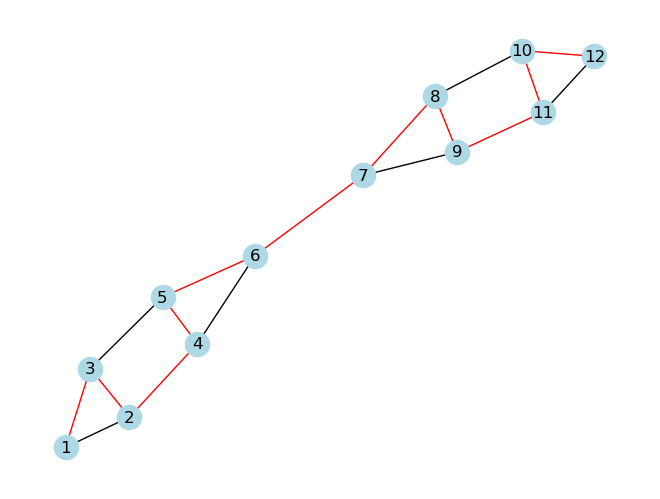

In [8]:
color_map = ["black","red","red","red","black","red","black","red","red","red","black","red","black","red","red","red","black"]
nx.draw(network,positions,node_color="lightblue",edge_color=color_map,with_labels=True) # highlight our long path

However, this might not be the most efficient path since it takes a lot of driving. Another, faster route might be to skip 2,4,9, and 11, and head down the path through 3,5,6,7,8, and 10.

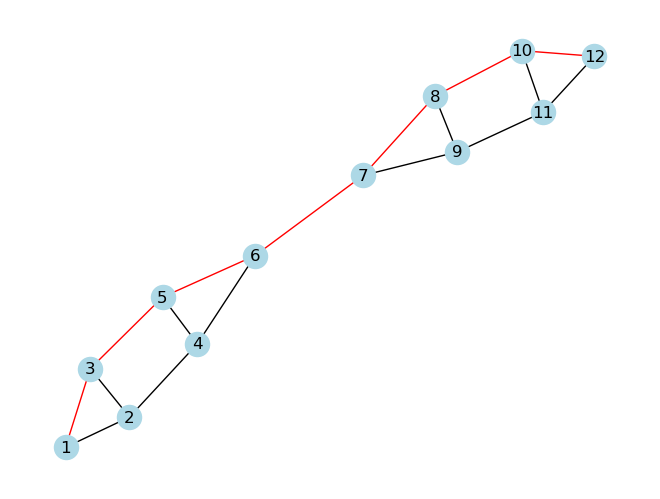

In [9]:
color_map = ["black","red","black","black","red","black","black","red","red","red","black","black","red","black","black","red","black"]
nx.draw(network,positions,node_color="lightblue",edge_color=color_map,with_labels=True) # highlight a shorter path

Clearly, this path will be a lot more efficient, since it gets to the final destination while traveling down 4 fewer roads than the previous path. Which one is “best” depends on your objective. Optimal transport and routing problems are a large part of operations research. In general, finding the shortest path from one node to another is very easy to do using a very famous heuristic called **dijkstra’s algorithm**. On the other hand, finding the shortest path that visits every single node in a graph is called the **travelling salesman problem**, and is notoriously difficult to solve (specifically, it is NP-hard.)

Lastly, let’s imagine that a storm comes, and the road between 6 and 7 floods and cannot be used. The network now looks like this:

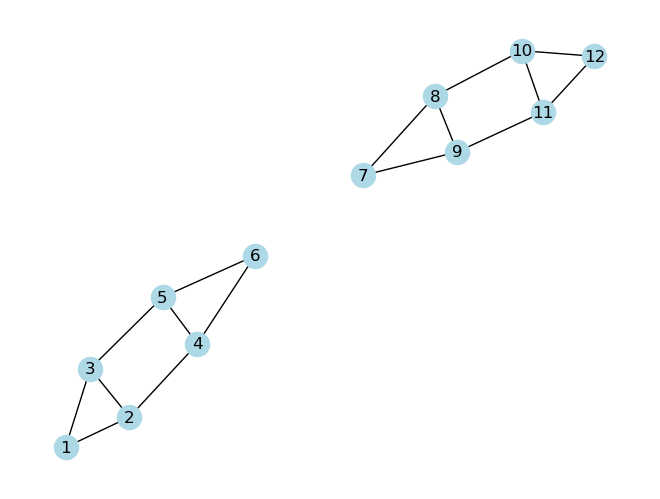

In [10]:
network.remove_edge(6,7) # delete the edge connecting node 6 to node 7
nx.draw(network,positions,node_color="lightblue",with_labels=True)

We can see that there is no longer any possible path that could connect node 1 to node 12. For any node from 1 to 6, there is still a path; just like on the right hand side, there is a path between any two nodes from 7 to 12. But there is no path that can connect any node in one of these sets to a node in the other. We would refer to these two sets as **connected components**.

### Matrix representations

We read in this network as an **edgelist**. Often, when you download network data, it will be stored as a list just like that. But often, to learn more about a network, it can be useful to think about a graph as a matrix.

The most common mathematical representation of a network is using its **adjacency matrix**. The adjacency matrix is a square matrix, with one row and one column for each node in the network. Since our toy network has 12 nodes, it’s adjacency will be a 12x12 matrix.

For a simple, unweighted graph, the adjacency matrix has 0’s on the diagonal, and a 1 in the $ (i,j)^{th} $ position if there is a link between node $ i $ and node $ j $. To refer to the adjacency matrix of a graph, we often use the letter $ A $.

Since our graph is undirected, if there is a link from $ i $ to $ j $, then there must also be a link from $ j $ to $ i $. This means that $ A_{ij} = A_{ji} $ for every node $ i $ and $ j $, so the adjacency matrix for an undirected graph will always be symmetric.

This all sounds a little abstract. To make it more concrete, let’s take a look at the adjacency matrix for our toy network:

In [11]:
network.add_edge(6,7) # add the (6,7) link back to get our original network
A = nx.adjacency_matrix(network).todense() # retrieve the network adjacency matrix, and store it as a dense numpy matrix (this will return a sparse matrix by default, which doesn't look as pretty)
print(A)

[[0 1 1 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 1 1 0 0 0 0 0 0]
 [0 0 1 1 0 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 1 0 0 0]
 [0 0 0 0 0 0 1 0 1 1 0 0]
 [0 0 0 0 0 0 1 1 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 1 1]
 [0 0 0 0 0 0 0 0 1 1 0 1]
 [0 0 0 0 0 0 0 0 0 1 1 0]]


To understand what’s going on here, take a closer look, thinking back to the structure of this network and its edgelist.

Remember, when we looked at the degree distribution, nodes 1 and 12 each had 2 links. If we look at the first row (or column) of this matrix, we see that there are exactly two entries equal to 1, and the rest are zeros. Same for row/column 12. But every other row/column of the matrix has exactly three 1’s, and the rest of the entries are 0.

Representing a network as a matrix connects the world of graph theory with the world of linear algebra, and gives us a lot of tools that we can use to analyze networks. In fact, the adjacency matrix has some properties that seem almost magical. For example, if you want to find the total number of paths of length $ k $ between two nodes, all you have to do is raise the adjacency matrix to the power $ k $, and look at the entry corresponding to the pair of interest.

Length 1 is easy… there is exactly one path of length one to every node you are connected to, and no paths of length one that can connect two nodes who do not share a link. But beyond 1 is when this gets interesting. This let’s us answer questions like the following: “how many shortest paths are there from node 1 to node 12?”

Above, we saw that the shortest path between 1 and 12 contained 7 edges. Let’s see what happens when we raise the adjacency matrix to the power 6.

In [12]:
n_paths = np.linalg.matrix_power(A,6)[0,11] # raise the adjacency matrix to the power 6, and print the entry in the first row, 12th column.
print("There are", n_paths, "paths of length 6 from node 1 to node 12") 

There are 0 paths of length 6 from node 1 to node 12


As we suspected, the entry in row 1, column 12 is equal to zero. This tells us that there are no paths of length 6 that can connect node 1 to node 12.

How about length 7?

In [13]:
n_paths = np.linalg.matrix_power(A,7)[0,11] # raise the adjacency matrix to the power 7
print("There are", n_paths, "paths of length 7 from node 1 to node 12")

There are 4 paths of length 7 from node 1 to node 12


So there are no paths of length 6 that connect node 1 to node 12, but there are exactly 4 paths of length 7. We drew one of these paths out earlier. Can you find the other 3?

The adjacency matrix is not the only convenient representation of a graph in matrix form. Another one, called the **laplacian**, has a lot of equally interesting properties.

The graph laplacian is similar to the adjacency matrix, except that the off-diagonal elements are negative and the diagonal elements contain the degree of each node. Equivalently, if we let $ D $ be a diagonal matrix with each diagonal element corresponding to the degree of the corresponding node, then the laplacian matrix $ L $ could be constructed as $ L = D - A $

We can get this matrix for our graph using `nx.laplacian_matrix()`:

In [14]:
L = nx.laplacian_matrix(network).todense() # retrieve and print the laplacian matrix for our toy network
print(L)

[[ 2 -1 -1  0  0  0  0  0  0  0  0  0]
 [-1  3 -1 -1  0  0  0  0  0  0  0  0]
 [-1 -1  3  0 -1  0  0  0  0  0  0  0]
 [ 0 -1  0  3 -1 -1  0  0  0  0  0  0]
 [ 0  0 -1 -1  3 -1  0  0  0  0  0  0]
 [ 0  0  0 -1 -1  3 -1  0  0  0  0  0]
 [ 0  0  0  0  0 -1  3 -1 -1  0  0  0]
 [ 0  0  0  0  0  0 -1  3 -1 -1  0  0]
 [ 0  0  0  0  0  0 -1 -1  3  0 -1  0]
 [ 0  0  0  0  0  0  0 -1  0  3 -1 -1]
 [ 0  0  0  0  0  0  0  0 -1 -1  3 -1]
 [ 0  0  0  0  0  0  0  0  0 -1 -1  2]]


## Spectral graph theory

The ability to represent any data on relationships between objects as a square, symmetric matrix, provides a convenient bridge between the worlds of graph theory and linear algebra.

One of the most useful tools in linear algebra, used to deal with square, symmetric matrices, is the eigenvalue decomposition. Given a square matrix $ M $, the **eigenvalues** $ \lambda $ and **eigenvectors** $ v $ of the matrix $ M $ are the values and vectors that satisfy the equation:

$$
Mv = \lambda v
$$

What this equation means is that multiplying the matrix $ M $ times the vector $ v $ has only the effect of *scaling* the vector $ v $ by a constant $ \lambda $, and that the result of this multiplication will thus be proportional to $ v $ and will not be rotated.

Often when they are introduced, eigenvalues and eigenvectors can seem like intimidating and abstract theoretical ideas with dubious practical value. But it turns out, they can tell us a *lot* about the structure of a dataset, and network data is no exception. Some of the results connecting eigenvalues to graph structure seem almost magical. If you can get a good, intuitive understanding of what they represent, it might just change the way you think about data.

### Eigenvector centrality

Often when dealing with network data, a natural question to ask is which node in the network is the most central, or most important. A metric that ranks each node by its importance is called a **centrality measure**.

In fact, we have already discussed one way to do this, called **degree centrality**. If all that is important in your network is how many links a node has, then looking at the degree distribution might give you a good idea of where to find the most central nodes. For example, in the karate club network, there were two nodes who had a much higher degree than the others. It might be natural to guess that these two nodes are the most influential.

Degree centrality, however, often does not tell the whole story. For example, lets revisit our toy network. Here, we’ll color every node by their degree centrality, with lighter colors indicating higher centrality.

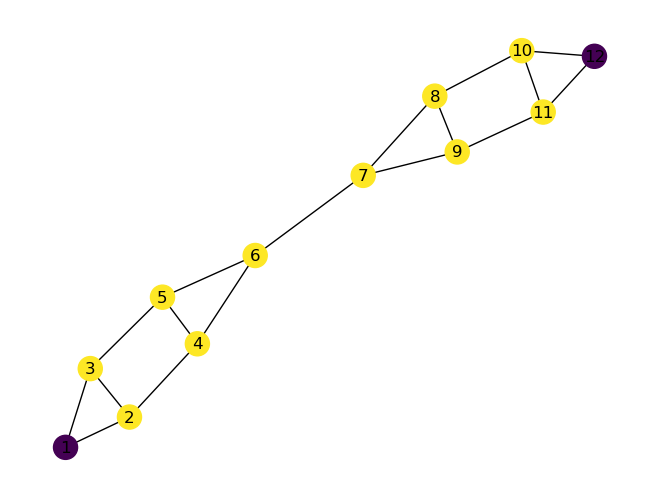

In [15]:
degrees = network.degree() # retrieve the degree sequence 
degree_colors = [degrees[i] for i in range(1,13)] # turn it into a vector
nx.draw(network,positions,node_color=degree_colors,with_labels=True) # plot the network with colors according to degree

In this network, almost every node has the same degree. So if we wanted to know which nodes were the most important, number of connections alone would not really give us much useful information.

Another idea, when trying to work out which nodes are the most influential, might accomodate some kind of “popularity effect”. Think about online social networks. If you want to learn how popular someone is, you might glance through their friends list. If they have a lot of friends, but their friends don’t seem very popular, then they might not be so influential. But if they are friends with Queen Elizabeth and the pope, you might get the idea that they are a pretty powerful person, even if they don’t have that many friends in total.

So a node is important if it is connected to other important nodes, who are themselves important because they are also connected to important nodes, and so on. It seems like this line of reasoning might just go on forever. But actually, it doesn’t. To see why, let’s try to formalize this idea mathematically. Let’s imagine that there is some number $ x_i $ that represents the centrality of a node $ i $.

Further, we’ll say that the centrality of a node is proportional to the sum of centralities of its neighbors, with some constant of proportionality; let’s call that constant $ \frac{1}{\mu} $.

Remember that the adjacency matrix is a matrix where $ A_{ij} = 1 $ if nodes $ i $ and $ j $ are connected, and $ A_{ij}=0 $ otherwise. Then we can write an expression for the centrality of a node $ i $ as:

$$
x_i = \frac{1}{\mu} \sum_{j=1}^n A_{ij} x_j
$$

If we stack these centrality measures $ x_i $ into a vector $ x $, the result will be a vector whose entries each correspond with the inner product of a row from a matrix with another vector. This is a roundabout way of saying, we can rewrite this equation as:

$$
x = \frac{1}{\mu} Ax
$$

or

$$
A x = \mu x
$$

It turns out that this measure of centrality, which we have constructed based on an argument about “popularity” as being the condition of being connected to other “popular” things, corresponds exactly with an eigenvector of the adjacency matrix! This measure is called **eigenvector centrality**. Eigenvector centrality can usually tell us a lot more about the distribution of influence than degree alone. To see, let’s try it out on our toy network. First, we’ll use `nx.eigenvector_centrality()`

In [16]:
centrality = nx.eigenvector_centrality(network) # compute eigenvector centrality using networkx
print(centrality)

{1: 0.18534426214696834, 2: 0.26793425519264535, 3: 0.26793425519264535, 4: 0.32137618934240997, 5: 0.32137618934240997, 6: 0.33985977126665573, 7: 0.3398597712666558, 8: 0.32137618934241, 9: 0.32137618934241, 10: 0.2679342551926454, 11: 0.2679342551926454, 12: 0.1853442621469684}


The first thing we might notice here is that it’s no longer the same situation as the degree; there is a lot more variance in the eigenvector centrality measure. Let’s visualize this by coloring nodes according to their eigenvector centrality, with lighter colors corresponding to higher centrality.

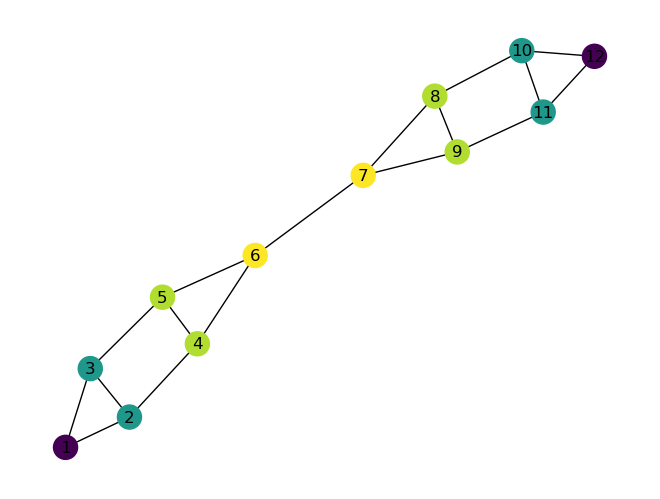

In [17]:
cent_colors = [centrality[i] for i in range(1,13)] # build a list of eigenvector centralities
nx.draw(network,positions,node_color=cent_colors,with_labels=True) # plot the graph with colors according to this list

As we suspected, considering influence as being the result of connections with other influential friends gives us a centrality measure that looks way more informative. Nodes that appear to be in “central” positions are indeed considered more “central”, while nodes that are further from the center have lower centrality.

There is no “perfect” centrality measure that always gives the best ranking of nodes in a network, it always depends on the problem you are trying to use networks to solve. However, eigenvector centrality has proved immensely useful in *many* areas. For one thing, it turns out that it can help us find a good target to “seed” information so that it will flow quickly through the network. Additionally, different versions of this measure can be used in game theory to find the Nash equilibria of games that are played over networks.

If you are still not convinced of how important this concept is, you should know that this idea has definitely already played a huge role in your life. In fact, it’s so ubiquitous that you might be using it every single day, without even knowing it. At Stanford in 1999, a group of researchers led by Larry Page and Sergey Brin, had the idea to build a version of eigenvector centrality (which they called PageRank) that could be used to rank websites based on their relevance. Brin and Page thought their work was so valuable that they eventually left Stanford to start their own company, called Google, that would use this version of eigenvector centrality to help people find information on the world wide web. While they have surely made some changes since 1999, the PageRank algorithm still forms the backbone of the google search engine, helping us all find the information we need by ranking it based on how influential it is in the ever-growing network that is the world wide web.

### Spectral graph clustering

In addition to the adjacency matrix, the laplacian matrix of a network is also particularly interesting because of the unique properties of its eigenvalues. They can be used to find natural ways to **partition** or **cluster** the nodes of a network.

To understand how this works, it will be helpful to try and get an intuitive understanding of what these eigenvalues actually represent. First, let’s look at the **spectrum** (set of eigenvalues) of the laplacian of our toy network, by plotting them in increasing order:

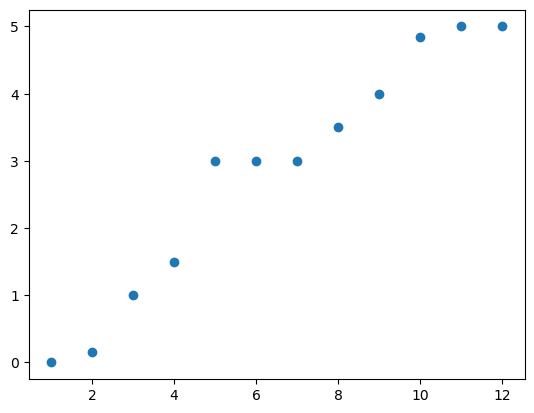

In [18]:
(u,v) = np.linalg.eig(L) # get the eigenvalue decomposition of the laplacian matrix
u_sorted = np.sort(u) # sort the eigenvalues
v_sorted = v[:, u.argsort()] # sort the eigenvectors to match the eigenvalues
plt.scatter(range(1,13),u_sorted) # show a scatterplot of the eigenvalues in increasing order

The first thing we might notice is that all of these eigenvalues are non-negative, and that there is one equal to zero. This means that our laplacian matrix is positive semidefinite.

Actually, all graph laplacian matrices are positive semidefinite by construction. When we add the degrees to the diagonal of the negative adjacency, it makes all of our row and column sums non-negative. This gives us a guarantee that the matrix we construct will always have strictly nonnegative eigenvalues.

Now, let’s try removing a link from our network, to see how that will change its eigenvalues. First, let’s remove the link $ (1,2) $.

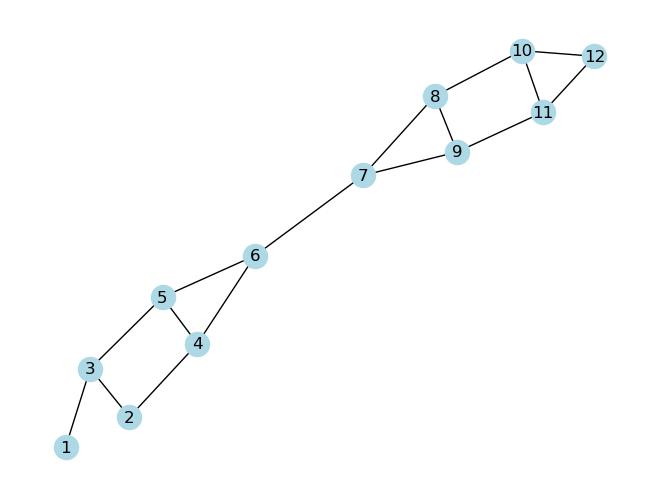

In [19]:
network.remove_edge(1,2) # remove the edge connecting node 1 to node 2, and draw the network
nx.draw(network,positions,node_color="lightblue",with_labels=True)

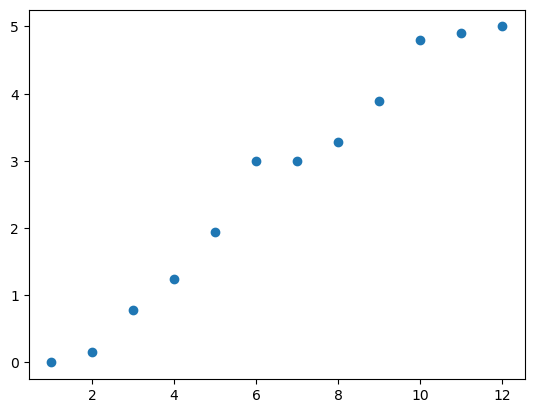

In [20]:
L = nx.laplacian_matrix(network).todense() # get the laplacian matrix of our new graph, without the (1,2) edge
(u,v) = np.linalg.eig(L) # get the eigenvalue decomposition of the laplacian matrix
u_sorted = np.sort(u) # sort the eigenvalues
v_sorted = v[:, u.argsort()] # sort the eigenvectors to match the eigenvalues
plt.scatter(range(1,13),u_sorted) # show a scatterplot of the eigenvalues in increasing order

We can see that not much has changed (although a few eigenvalues are lower than before). Let’s add that one back and try a different edge. This time, we’ll use $ (6,7) $ again.

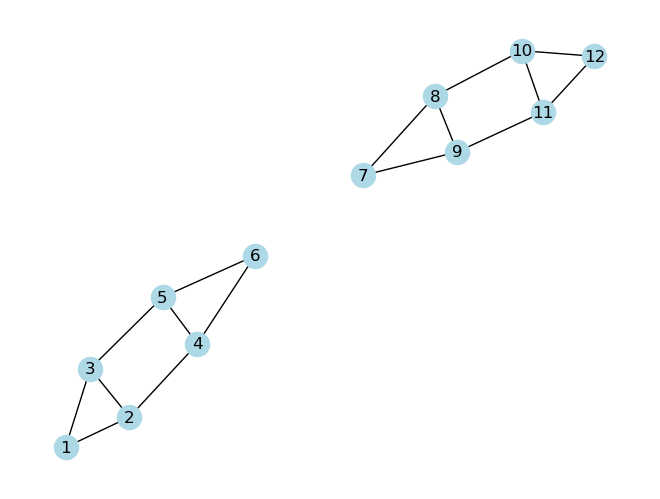

In [21]:
network.add_edge(1,2) # return the graph to normal
network.remove_edge(6,7) # delete the link from 6 to 7, and draw the network
nx.draw(network,positions,node_color="lightblue",with_labels=True)

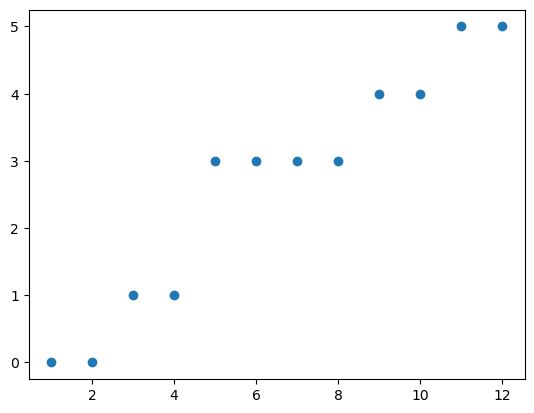

In [22]:
L = nx.laplacian_matrix(network).todense() # get the laplacian matrix of our new graph, without the (6,7) edge
(u,v) = np.linalg.eig(L) # get the eigenvalue decomposition, sort the values and vectors, and plot the resulting sequence
u_sorted = np.sort(u)
v_sorted = v[:, u.argsort()]
plt.scatter(range(1,13),u_sorted)

Now, removing this edge had a very different impact on the spectrum of our laplacian matrix. In particular, one thing we might notice is that there are now 2 eigenvalues equal to zero, where before there was only one. Lets try removing a few more edges.

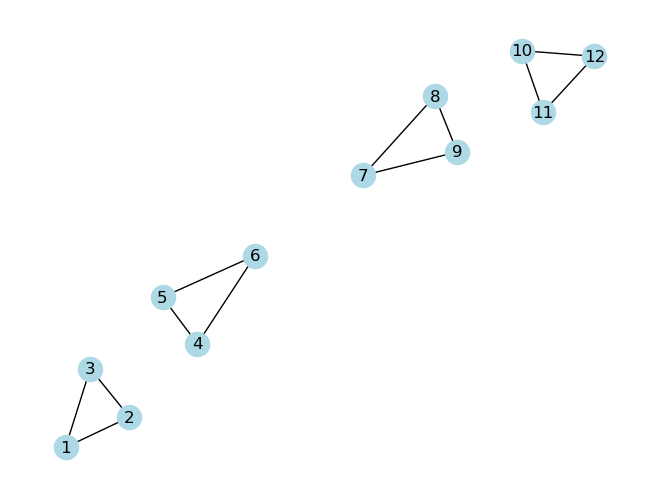

In [23]:
network.remove_edges_from([(3,5),(2,4),(8,10),(9,11)]) # remove a set of links, plot the result
nx.draw(network,positions,node_color="lightblue",with_labels=True)

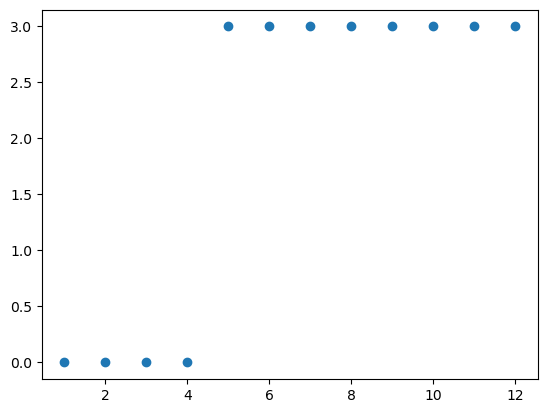

In [24]:
L = nx.laplacian_matrix(network).todense() # get the laplacian matrix of our new "islands" graph
(u,v) = np.linalg.eig(L) # get the eigenvalue decomposition, sort the values and vectors, and plot the resulting sequence
u_sorted = np.sort(u)
v_sorted = v[:, u.argsort()]
plt.scatter(range(1,13),u_sorted)

Now, the network has been broken up into 4 connected components, and has exactly 4 eigenvalues equal to zero.

As it turns out, this is not a coincidence. The eigenvalues of the laplacian matrix are a really handy way to measure its connectivity; they are called the **algebraic connectivity** of the graph. Specifically, the number of connected components in a graph is exactly equal to the multiplicity of the null eigenvalue (in other words, the number of zeros in the spectrum of the matrix.)

Now let’s take a step back and take another look at the spectrum of our original graph.

In [25]:
network.add_edges_from([(3,5),(2,4),(8,10),(9,11),(6,7)]) # add back the set of edges that we deleted

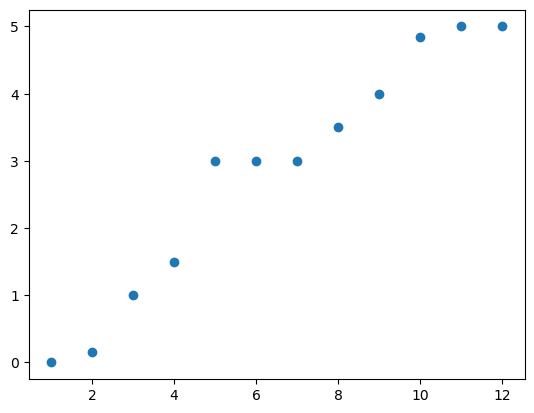

In [26]:
L = nx.laplacian_matrix(network).todense() # retrieve the spectrum of our original graph
(u,v) = np.linalg.eig(L)
u_sorted = np.sort(u)
v_sorted = v[:, u.argsort()]
plt.scatter(range(1,13),u_sorted) # remind us what the plot looked like

Now that we’ve seen a few of these, we can get a better idea what we’re looking at. In particular, we can see that the graph is fully connected, because there is only one eigenvalue that is equal to zero. But that second eigenvalue is still looking awfully close to zero. Let’s investigate this second eigenvalue a little more by looking at it’s associated eigenvector.

In [27]:
print(v_sorted[:,1])

[ 0.36274292  0.33412898  0.33412898  0.2528014   0.2528014   0.13159078
 -0.13159078 -0.2528014  -0.2528014  -0.33412898 -0.33412898 -0.36274292]


In this vector, half of the entries are negative and half are positive. Let’s color the nodes in our graph according to whether they have a positive entry or a negative entry.

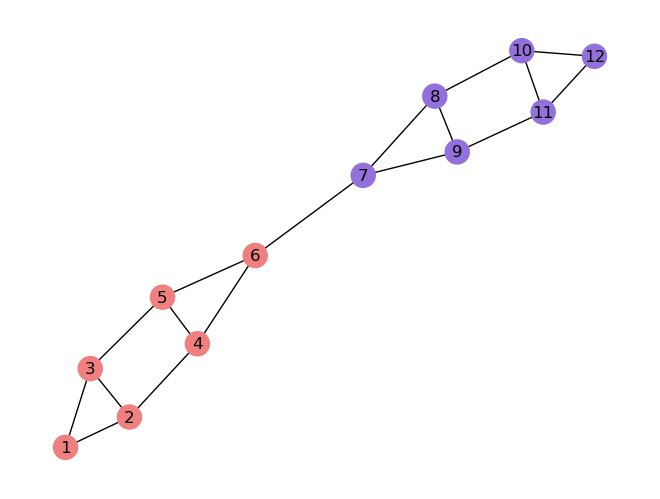

In [28]:
colors = [ "lightcoral" for i in range(1,13) ] # assign a nice reddish color to all nodes
for i in range(0,12): # for any nodes that have a negative entry, replace this with a nice purplish color
    if (v[i,1] < 0):
        colors[i] = "mediumpurple"
        
nx.draw(network,positions,node_color=colors,with_labels=True) # draw the result

Coloring nodes by their sign in this vector sorts them into two groups, on either side of the $ (6,7) $ link!

This is what we might think of as the most natural partitioning of this network into two groups. And this is not a coincidence. In fact, the eigenvector associated with the second smallest eigenvalue of the laplacian even has its own name: the **Fiedler vector**. Its associated eigenvalue is called the **spectral gap** (since it is technically the difference between the second smallest and the smallest eigenvalue, which is zero).

In economics, the second smallest eigenvalue of the graph laplacian is often referred to as the network’s **spectral homophily**. That is because **homophily** refers to a type of *segregation* in a network, that emerges when two different types of nodes preferentially attach themselves to other nodes of the same type, and discriminate against the other type by forming fewer friendships with them.

What this eigenvalue does exactly, is provide an approximation of the difficulty required to “cut” the graph into two separate components. If the second lowest eigenvalue of the graph’s laplacian is zero, it means we wouldn’t have to cut *any* edges to split the graph into two components, because it’s *already split* and there is no cutting required. If it is close to zero, like in this case, then we would only need to cut a few links (in this case, just one) in order to cut the graph into two components. In fact, roughly speaking, *for each subsequent eigenvalue, the increase in value from the previous one gives us a measure of the marginal difficulty required to segment the graph into one additional component*.

For example, in our case we saw that it was relatively easy to split this network into four components, but we can see that there is a big jump from the fourth to the fifth eigenvalue. This tells us that there is *not* a natural segmentation of the graph into 5 components. (This logic actually generalizes quite well to discovering larger numbers of clusters; all you would need to do is take the first four eigenvalues of the laplacian, and run a clustering algorithm (like K-Means) on the eigenvectors, with K equal to the number of clusters you wish to discover. This class of methods is known as **spectral clustering**.)

## Applications

As a final exercise, let’s look at how these concepts can be applied to economic problems. First, let’s move back to Zachary’s Karate Club network. Let’s take a look at it again, but highlighting the centralities of each node.

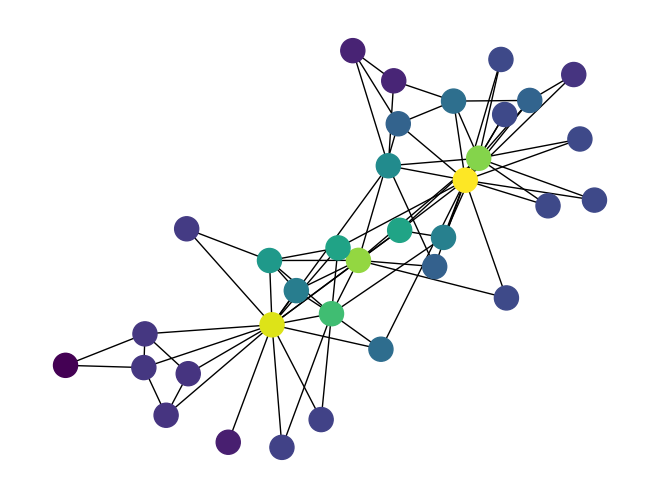

In [29]:
eigen_cent = nx.eigenvector_centrality(karate)
eigen_colors = [eigen_cent[i] for i in range(0,34)]
nx.draw(karate,karate_layout,node_color=eigen_colors)

We see that there are two really highly central (yellow) nodes, on opposite sides of the network. This might be an indication that there is some homophily in the network. To verify this, let’s take a look at the natural partitioning of this network by plotting the eigenvalues of its laplacian matrix.

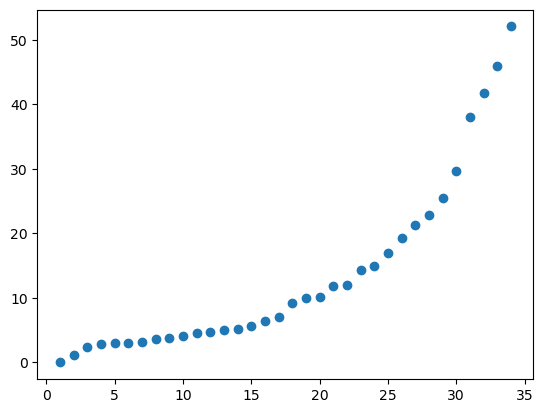

In [30]:
L = nx.laplacian_matrix(karate).todense() # retrieve and plot the spectrum of Zachary's karate club graph
(u,v) = np.linalg.eig(L)
u_sorted = np.sort(u)
v_sorted = v[:, u.argsort()]
plt.scatter(range(1,35),u_sorted)

There are no big jumps between the first few eigenvalues so it is clear that there is a lot of segregation in this network, making it easy to partition. Let’s again color the nodes by their entries in the Fiedler vector (the eigenvector corresponding to the second lowest eigenvalue):

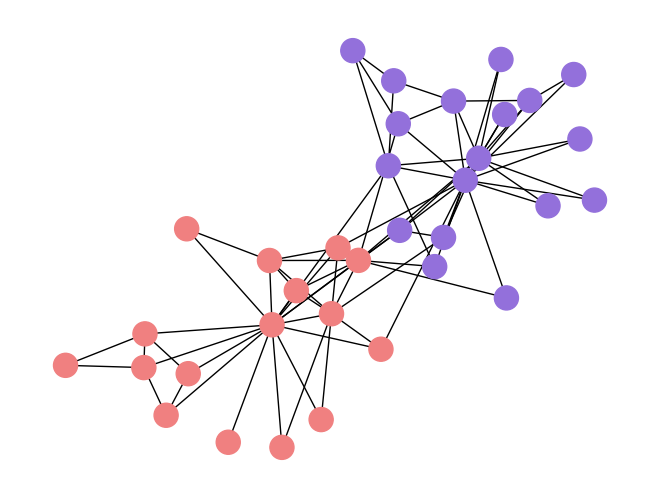

In [33]:
colors = [ "lightcoral" for i in range(0,34) ] # assign colors to the nodes based on the sign of their entry in the Fiedler vector
for i in range(0,34):
    if (v_sorted[i,1] < 0):
        colors[i] = "mediumpurple"
        
nx.draw(karate,karate_layout,node_color=colors) # draw the result

Again, this spectral homophily partitions the network in a way that seems very natural; into two dense clusters with sparse connections between them, and with each one containing its own highly central hub.

In this case, that is not a surprise. In his original study, Wayne Zachary collected this network dataset from a set of two warring karate clubs in the same area. He collected information about who each individual member would spend the most time with, used that data to construct a graph, and found that the disconnect between clubs persisted into their social networks. Using the spectrum of this graph, we can learn that there are two easily disconnected groups in the network, without ever hearing this backstory.

In social networks, this type of homophily is universally bad. Not only normatively, but also quantitatively. Economic research, beginning with a 2012 study by Benjamin Golub and Matthew Jackson, has shown that the size of this spectral homophily gives an indication of how fast information spreads through a social network. If the Fiedler value is very large, it indicates that the network structure will be effective at spreading information quickly. If the value is close to zero, on the other hand, new information may take a very long time to diffuse through the network, because it can take a long time for information starting in the red area to spread to the blue area and vice versa. (If you have any prior exposure to ordinary differential equations, this connection between eigenvalues and dynamics may not come as a huge surprise. In fact the laplacian matrix has a satisfying interpretation as describing diffusion processes over a network, which can explain a lot about it’s spectral properties.)

What this means, is that segregated social networks are also characterized by a large amount of disagreement or discord.

Graph clustering can be a useful concept outside of social networks too. Let’s take a look at how graph clustering and spectral homophily could be used in a simple portfolio selection problem.

In [34]:
url = "https://raw.githubusercontent.com/doctor-phil/analyzing-economic-networks/main/stocks.csv"
df = pd.read_csv(url) # load a dataset of weekly returns for some popular stocks over the past year
df.head(5) # take a peek at the data

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

First, let’s pretend that we don’t already recognize most of these ticker symbols.

Imagine you work at a bank. Your boss gives you this set of stocks and data, and tells you to pick two stocks from the dataset to buy. But first, you want to get a better idea of what you’re looking at.

One idea would be to look at the correlations between the returns of these stocks, to tell you how much comovement there is between their returns. Ideally, you want to choose stocks that are in different sectors, to make sure your portfolio is diversified. To examine correlations, we can construct a correlation matrix from our pandas dataframe using `pd.corr()`:

In [35]:
returns = df[1:] # remove the dates
corr = returns.corr() # calculate the correlations between the returns of each pair of stocks
corr # display the correlation matrix

NameError: name 'df' is not defined

All of these stocks are really highly correlated with each other. Let’s try to pick out only the ones that are exceptionally strongly correlated with each other.

The minimum correlation we can see in this matrix is around 0.89, which is still pretty big. Somewhat arbitrarily, let’s say that two stocks are “extremely correlated” if they have a correlation coefficient that is greater than 0.92, and make a matrix that will tell us which stocks are “extremely correlated” with each other.

In [ ]:
def truncate(f): # define a function that "rounds" a number to 0 if it is lower than 0.92, and to 1 if it is higher (or equal).
    if (abs(f) < 0.92):
        return 0.
    else:
        return 1
    
# we already know that every stock is perfectly correlated with itself, so the ones on the diagonal are not really useful information. Let's get rid of them.
adj = corr.applymap(truncate) - np.identity(10)
adj

Does this look familiar? It has zeros on the diagonal, and has a 1 in the $ (i,j)^{th} $ position if the performance of stock $ i $ is related through “extreme correlation” with the returns of stock $ j $…

This is an adjacency matrix for an undirected graph!

Let’s take a look at it.

In [ ]:
stocknet = nx.from_numpy_array(adj.to_numpy()) # initialize a new graph from our adjacency matrix
stocknet = nx.relabel_nodes(stocknet, dict(enumerate(adj.columns))) # keep the stock tickers as the names of the nodes (instead of integers)
stock_layout = nx.spring_layout(stocknet,seed=10) # fix our layout
nx.draw(stocknet,stock_layout) # plot the graph, without any labels (for now)

It’s hard to get much information about this graph, just by looking at it. Let’s take a look at its underlying structure by examining its spectrum.

In [ ]:
L = nx.laplacian_matrix(stocknet).todense()
(u,v) = np.linalg.eig(L)
u_sorted = np.sort(u)
v_sorted = v[:, u.argsort()]
colors = [ "lightcoral" for i in range(0,10) ]
for i in range(0,10):
    if (v_sorted[i,1] < 0):
        colors[i] = "mediumpurple"
        
nx.draw(stocknet,stock_layout,node_color=colors)

Ok, so our spectral homophily identifies two distinct groups in the data. But what do they represent?

To understand, let’s add the labels back in.

In [ ]:
nx.draw(stocknet,stock_layout,node_color=colors,with_labels=True)

Forming a network based on this simple method, and looking at its spectrum, was enough to cleanly identify both of the sectors in our dataset.

We were able to identify a cluster of technology stocks (the red nodes, Amazon, Google, Microsoft, Facebook, and Apple) as being distinct from the stocks in the financial services sector (purple nodes, Citibank, JP Morgan, Bank of America, Wells Fargo, and Visa), without using any information about their names or what they do. Now you can pick 2 stocks for your boss, and be confident that you are recommending a diverse portfolio that spans multiple sectors.

This highlights a few important closing points. We obtained this network by looking at a correlation matrix and sparsifying the network by arbitrarily choosing to treat correlations more than 0.92 as being links, and ignoring those with a correlation of less than 0.92. But there are *infinite* ways that we could have formed this network, for example, by choosing any other real value between 0 and 1 (which would change the density), by keeping all of the correlations and building a **weighted** network, by only forming links from one stock to the three most highly correlated others (by **k-nearest-neighbors** or **KNN**), or even by using a different distance metric than correlation entirely. For example, you could even build a network with links between companies whose names share a letter. Even though that is a perfectly valid network, it might not be the most informative choice in this particular setting.

Thus, an important lesson to take away from this exercise is that a network can be used to represent basically any kind of data. This gives them the potential to be a powerful and convenient tool to understand underlying relational structure in a dataset. Often however, it comes down to the data scientist to understand *which* networks contain the information they need. Even using this very limited information about extreme correlations, we were able to use spectral clustering to correctly identify the two distinct sectors that comprise our dataset based only on their weekly returns. A worthwhile exercise, whenever you are faced with this choice, is to try forming the network in a bunch of different ways. If you get the same results, that’s great! Otherwise, you might need to take a step back and think more carefully about what types of relationships are relevant for the problem you are interested in.